In [82]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [95]:
data = pd.read_excel('Data.xlsx')

In [96]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098.0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2.0,0.0,62.1544,40.77,High
1,26341.0,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9.0,0.1,-288.7650,923.63,Critical
2,25330.0,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9.0,0.1,919.9710,915.49,Medium
3,13524.0,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5.0,0.1,-96.5400,910.16,Medium
4,47221.0,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8.0,0.0,311.5200,903.04,Critical


In [97]:
data.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [98]:
data.drop(['Row ID', 'Order ID', 'Postal Code'], axis=1, inplace=True)

In [100]:

data=pd.get_dummies(data=data, columns=['Category'], prefix_sep='_product_')
data=pd.get_dummies(data=data, columns=['Sub-Category'])


# data=pd.get_dummies(data=data, columns=['Market'])
# data=pd.get_dummies(data=data, columns=['Segment'])
# data=pd.get_dummies(data=data, columns=['Region'])


# data=pd.get_dummies(data=data, columns=['City'])
# data=pd.get_dummies(data=data, columns=['State'])
# data=pd.get_dummies(data=data, columns=['Country'])










data=pd.get_dummies(data=data, columns=['Order Priority'])
data=pd.get_dummies(data=data, columns=['Ship Mode'])

In [101]:
data_by_customer=data.groupby(['Customer ID']).sum() #add the location

In [102]:
data_by_customer

,Sales,Quantity,Discount,Profit,Shipping Cost,Category_product_Furniture,Category_product_Office Supplies,Category_product_Technology,Sub-Category_Accessories,Sub-Category_Appliances,...,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class
Customer ID,,,,,,,,,,,,,,,,,,,,,
AA-10315102,544.6560,31.0,2.500,-153.0540,58.63,0,4,2,1,0,...,2,0,0,4,0,2,4,0,0,2
AA-10315120,2713.4100,7.0,0.000,27.0900,167.35,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
AA-10315139,2955.7980,36.0,0.400,514.6680,436.19,2,7,4,0,0,...,0,0,3,9,0,1,1,0,12,0
AA-103151402,4780.5520,19.0,0.800,-650.5971,318.94,0,4,2,1,1,...,1,0,0,0,0,6,0,0,0,6
AA-103151404,753.5080,6.0,0.200,274.4320,63.36,0,3,0,0,1,...,0,0,1,0,0,2,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZD-2192548,1302.1680,12.0,0.200,-56.6220,96.54,1,2,1,0,0,...,0,0,0,2,0,2,0,0,2,2
ZD-2192564,1225.3920,9.0,1.300,-882.9780,93.72,1,2,1,0,0,...,0,1,0,0,0,4,0,0,0,4
ZD-219257,59.9400,4.0,0.100,11.9400,2.31,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [103]:

market = data[['Market','Customer ID', 'Segment', 'Region']]

data_by_customer = data_by_customer.join(market.set_index('Customer ID'),on='Customer ID')


In [104]:
data_by_customer=pd.get_dummies(data=data_by_customer, columns=['Market'])
data_by_customer=pd.get_dummies(data=data_by_customer, columns=['Segment'])
data_by_customer=pd.get_dummies(data=data_by_customer, columns=['Region'])


In [105]:
# scales our data
from sklearn.preprocessing import StandardScaler
#instanciation 
sc = StandardScaler()
#Normalization
Z = sc.fit_transform(S)
print(Z)

[[-0.47077799  0.99231035  1.69237995 ... -0.22349233 -0.35994655
  -0.25808611]
 [-0.47077799  0.99231035  1.69237995 ... -0.22349233 -0.35994655
  -0.25808611]
 [-0.47077799  0.99231035  1.69237995 ... -0.22349233 -0.35994655
  -0.25808611]
 ...
 [-0.37840945 -0.91117451 -0.27028488 ... -0.22349233 -0.35994655
  -0.25808611]
 [-0.66136761 -0.47190877 -0.64635317 ... -0.22349233 -0.35994655
  -0.25808611]
 [-0.66136761 -0.47190877 -0.64635317 ... -0.22349233 -0.35994655
  -0.25808611]]


In [92]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=20)
# ZZ = pca.fit_transform(Z)

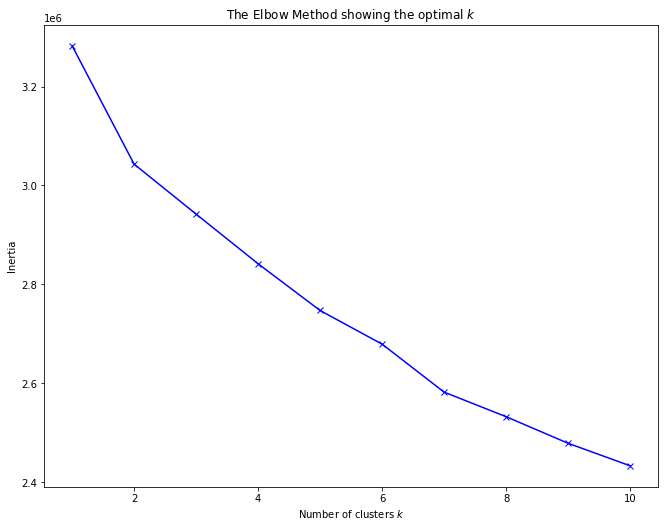

In [106]:
wss = []
for i in range(1,11):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(Z)
    wss.append(fitx.inertia_)

plt.figure(figsize=(11,8.5))
plt.plot(range(1,11), wss, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

In [107]:
model = KMeans(n_clusters=2, init='random', n_init=3, random_state=109).fit(Z)

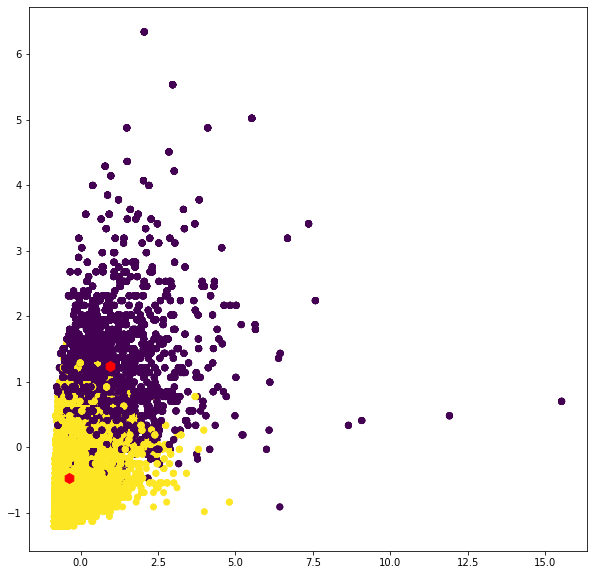

In [108]:
plt.figure(figsize=(10,10))
plt.scatter(Z[:,0],Z[:,1], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], c='r', marker='h', s=100);

In [187]:
data

,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Market,Product ID,...,Discount,Profit,Shipping Cost,Category_product_Furniture,Category_product_Office Supplies,Category_product_Technology,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,...,0.0,62.1544,40.770,0,0,1,0,1,0,0
1,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,...,0.1,-288.7650,923.630,1,0,0,1,0,0,0
2,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,...,0.1,919.9710,915.490,0,0,1,0,0,0,1
3,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,...,0.1,-96.5400,910.160,0,0,1,0,0,0,1
4,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,...,0.0,311.5200,903.040,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Same Day,KE-1642066,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,Eastern Asia,Asia Pacific,OFF-FA-3072,...,0.0,4.5000,1.010,0,1,0,0,0,0,1
51286,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,Chattanooga,Tennessee,United States,Southern US,USCA,FUR-FU-4070,...,0.2,3.3440,1.930,1,0,0,0,1,0,0
51287,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,San Francisco,California,United States,Western US,USCA,OFF-AR-5321,...,0.0,2.4824,1.580,0,1,0,0,1,0,0
51288,Standard Class,RB-1979518,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,South America,LATAM,OFF-BI-2919,...,0.0,2.4000,1.003,0,1,0,0,0,0,1


In [192]:
data_by_product = data.groupby('Product ID').sum()

In [203]:
data_by_product

,Sales,Quantity,Discount,Profit,Shipping Cost,Category_product_Furniture,Category_product_Office Supplies,Category_product_Technology,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
Product ID,,,,,,,,,,,,
FUR-BO-3174,400.0268,3.0,1.02,-113.2606,41.54,2,0,0,0,1,0,1
FUR-BO-3175,7539.7122,35.0,1.47,780.3302,1009.83,8,0,0,1,3,1,3
FUR-BO-3176,5184.0810,27.0,1.60,-126.4410,743.43,6,0,0,2,3,0,1
FUR-BO-3177,5492.8850,26.0,2.53,15.0490,545.53,8,0,0,0,4,1,3
FUR-BO-3409,1897.8102,31.0,2.52,-612.9387,193.24,8,0,0,0,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
TEC-PH-6365,8878.4000,32.0,2.20,515.5200,810.45,0,0,10,0,1,0,9
TEC-PH-6413,5327.2600,17.0,1.00,1043.8550,632.50,0,0,6,0,2,0,4
TEC-PH-6425,4044.3860,24.0,1.00,733.2812,422.95,0,0,7,0,3,0,4


In [194]:
# scales our data
from sklearn.preprocessing import StandardScaler
#instanciation 
sc = StandardScaler()
#Normalization
Z = sc.fit_transform(data_by_product)
print(Z)

[[-0.49660145 -1.08375961 -0.51237113 ... -0.79822487 -0.64845888
  -0.95769268]
 [ 0.71040925 -0.29687385 -0.26038155 ... -0.28193087  0.36489188
  -0.67477282]
 [ 0.31217433 -0.49359529 -0.18758456 ... -0.28193087 -0.64845888
  -0.95769268]
 ...
 [ 0.1195014  -0.56736583 -0.52357067 ... -0.28193087 -0.64845888
  -0.53331289]
 [-0.46199131 -1.03457925 -0.97155215 ... -1.05637186 -0.64845888
  -0.81623275]
 [-0.1787864  -1.05916943 -1.08354752 ... -1.05637186 -0.64845888
  -0.95769268]]


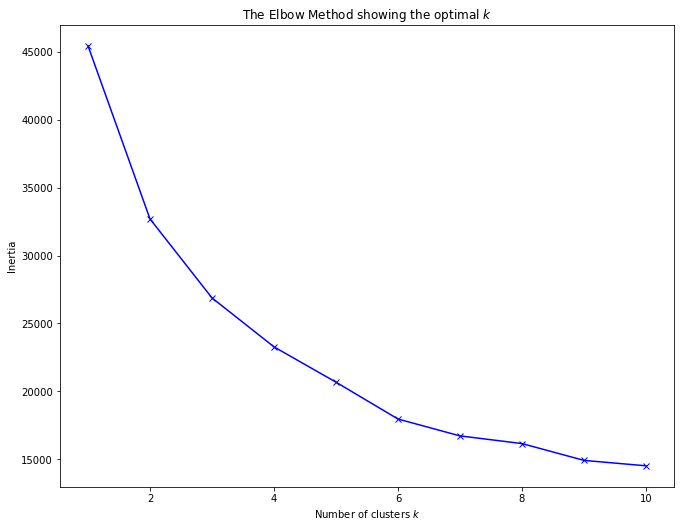

In [195]:
wss = []
for i in range(1,11):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(Z)
    wss.append(fitx.inertia_)

plt.figure(figsize=(11,8.5))
plt.plot(range(1,11), wss, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

In [200]:
model = KMeans(n_clusters=3, init='random', n_init=3, random_state=109).fit(Z)

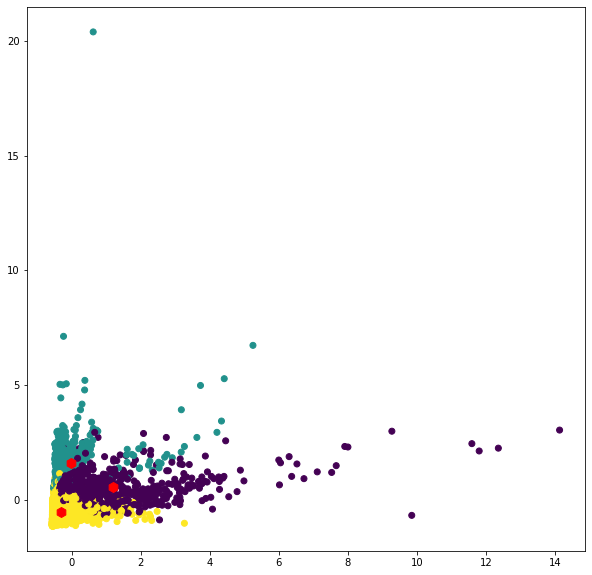

In [201]:
plt.figure(figsize=(10,10))
plt.scatter(Z[:,0],Z[:,1], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], c='r', marker='h', s=100);

Index(['Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State',
       'Country', 'Region', 'Market', 'Product ID', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Category_product_Furniture',
       'Category_product_Office Supplies', 'Category_product_Technology',
       'Order Priority_Critical', 'Order Priority_High', 'Order Priority_Low',
       'Order Priority_Medium'],
      dtype='object')